<a href="https://colab.research.google.com/github/matsunagalab/lecture_ML/blob/main/machine_learning_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第8回 教師なし学習その1: 基本的事項

## 3つの正規分布の K-means クラスタリング

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


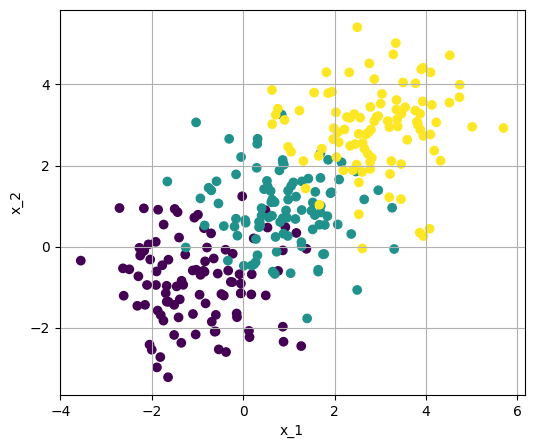

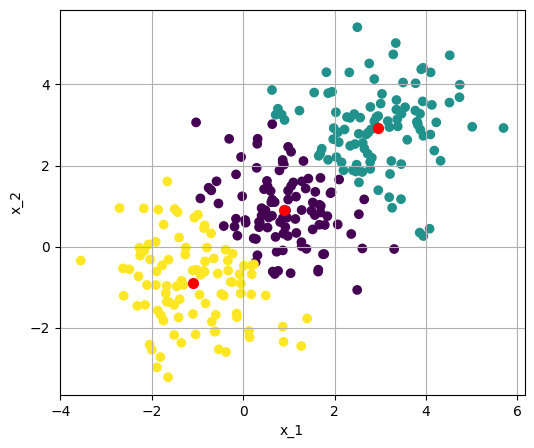

In [10]:
# Import required libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Set the seed for reproducibility
np.random.seed(0)

# Generate data from three different normal distributions
X1 = np.random.normal(loc=[-1, -1], scale=1, size=(100, 2))
X2 = np.random.normal(loc=[1, 1], scale=1, size=(100, 2))
X3 = np.random.normal(loc=[3, 3], scale=1, size=(100, 2))
X = np.vstack((X1, X2, X3))

# Define true labels for color-coding
labels_true = np.array([0]*100 + [1]*100 + [2]*100)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Plot the data colored by true labels
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_true)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.grid(True)
plt.show()

# Plot the data colored by K-Means clustering results
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red') # Plot cluster centers
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.grid(True)
plt.show()


## iris dataset の K-means クラスタリング

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


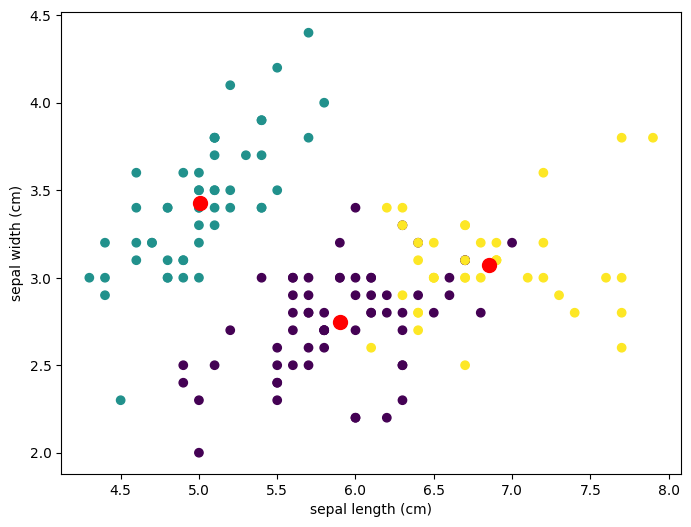

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

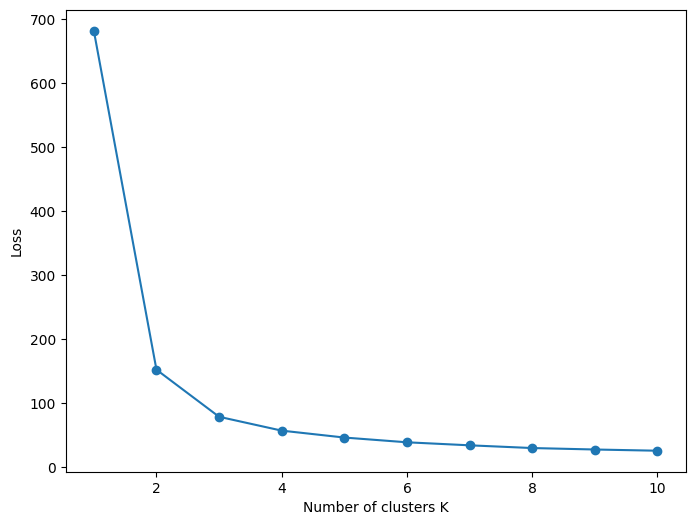

In [11]:
# Import required libraries
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data

# Choose the number of clusters
K = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(X)

# Plot the results of the clustering
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red') # Plot cluster centers
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

# Apply k-means for each number of clusters and store the resulting inertia
clusters = range(1, 11)
inertia = [KMeans(n_clusters=i).fit(X).inertia_ for i in clusters]

# Create an elbow plot
plt.figure(figsize=(8, 6))
plt.plot(clusters, inertia, '-o')
plt.xlabel('Number of clusters K')
plt.ylabel('Loss')
plt.show()


## MNIST dataset の K-meansクラスタリング

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

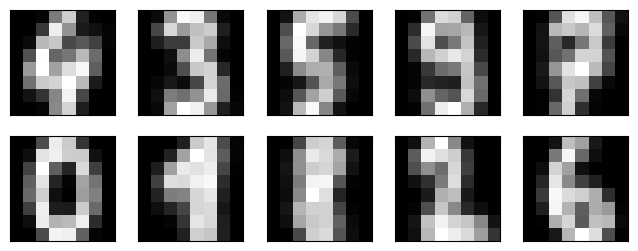

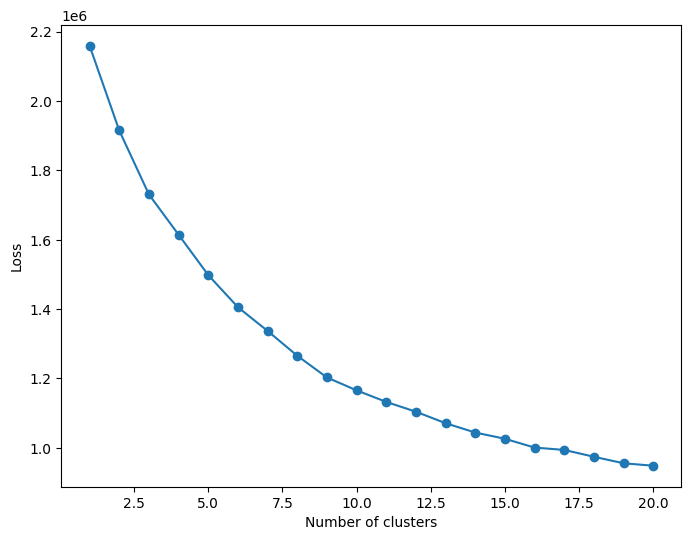

In [12]:
# Import required libraries
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the digits dataset
digits = datasets.load_digits()
X = digits.data

# Choose the number of clusters
K = 10

# Apply K-Means clustering
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(X)

# Plot the cluster centers as images
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap='gray')

# Find inertia for different cluster numbers for the elbow plot
clusters = range(1, 21) # Checking up to 20 clusters
inertia = [KMeans(n_clusters=i).fit(X).inertia_ for i in clusters]

# Create an elbow plot
plt.figure(figsize=(8, 6))
plt.plot(clusters, inertia, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Loss')
plt.show()


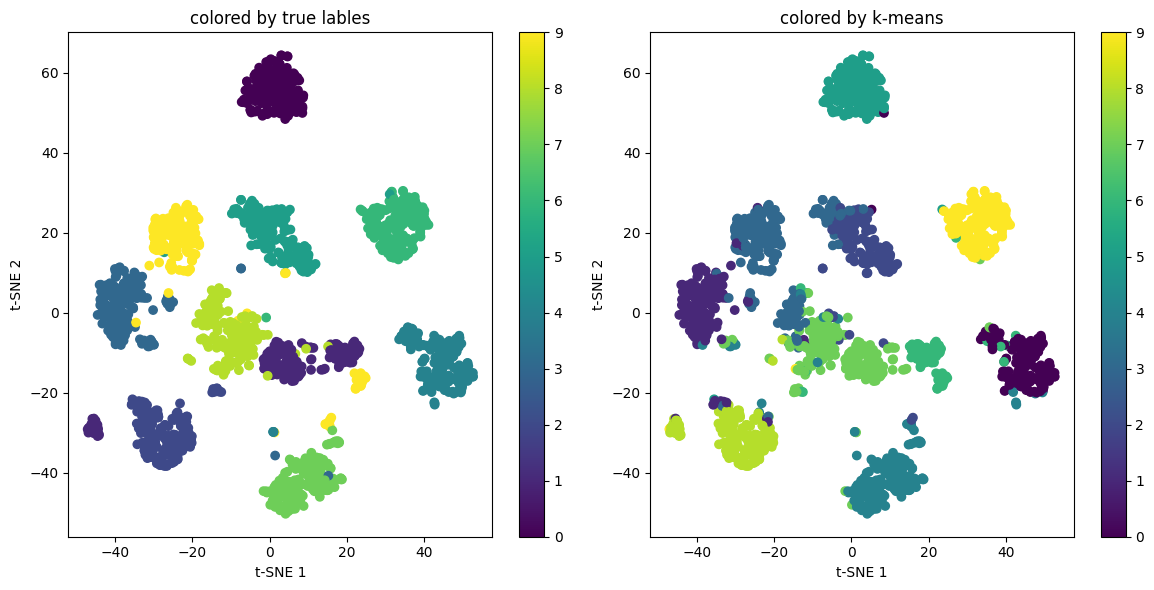

In [14]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

# Visualize the clustering results with true labels
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target, cmap='viridis')
plt.title('colored by true lables')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar()

# Visualize the clustering results with K-means labels
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('colored by k-means')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar()

plt.tight_layout()
plt.show()
